In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser  import parse
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl


plt.style.use('../enerdata.mplstyle')


# colores
azulier     = "#1A3D6F"
doradoier  = '#C65C25' 

In [27]:
f = '../../data/independencia.csv'
ind = pd.read_csv(f,index_col=0,parse_dates=True)
ind['Año'] = ind.index.year.astype(str)
ind.index

DatetimeIndex(['2011-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='año', freq=None)

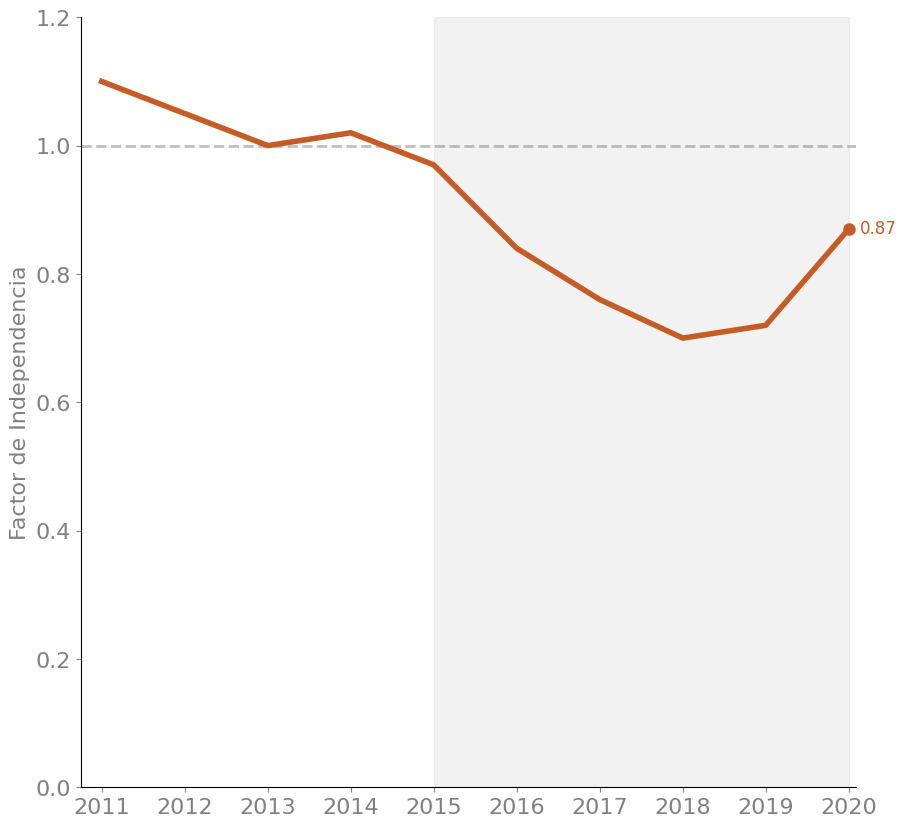

In [107]:

plt.style.use('../enerdata.mplstyle')
fig, ax = plt.subplots()

#Grafica datos
ax.axhline(y=1,alpha=0.5,ls='--',lw=2)
ax.plot(ind.Factor,color=doradoier)
ax.plot(ind.Factor[-1:],'o',color=doradoier,ms=8)

#Texto 
xy =  (mdates.date2num(dt.datetime(2019, 12, 31)),0.87)
ax.annotate('0.87', xy, xytext=(8,-3), 
            textcoords='offset points',
            color=doradoier,
           fontsize=12)


#Separaci'on por medio de background
ax.axvspan(parse("2014-12-31"),
           parse("2019-12-31"),
           alpha=0.1,color='gray')


#Etiquetas y texto
ax.set_ylabel("Factor de Independencia")

# Formato de gr'afica
ax.set_ylim(0,1.2)
ax.set_xlim(parse("2010-10-01"),parse("2020-02-01"))
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.spines[['top','right']].set_visible(False)



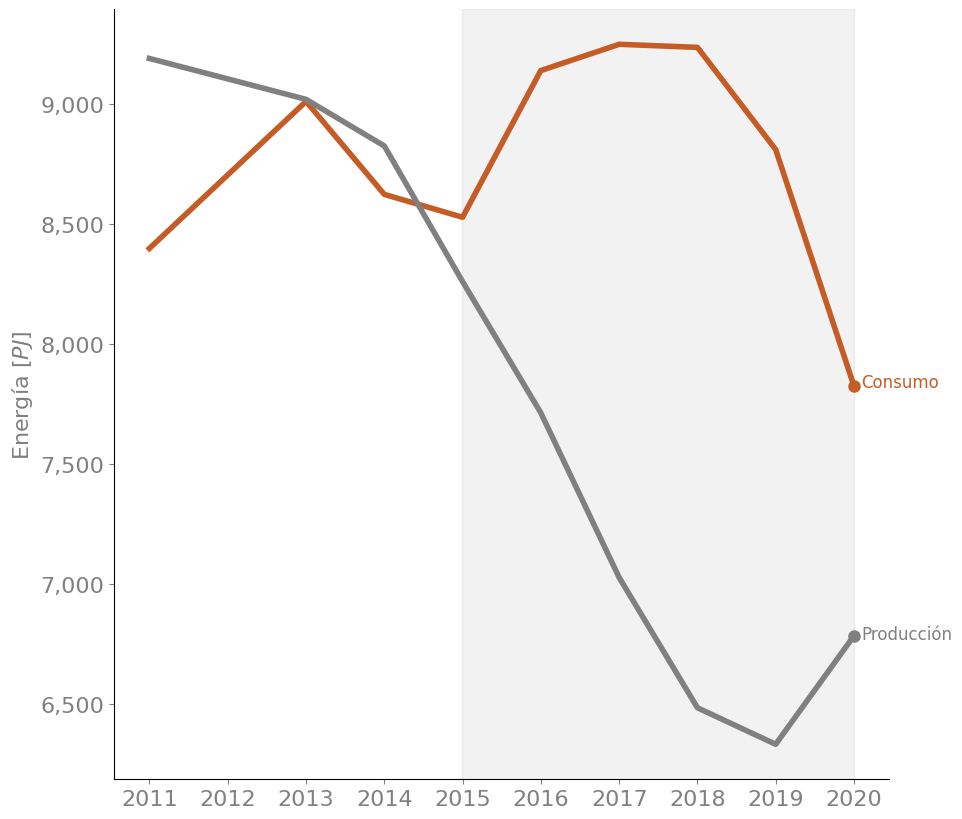

In [136]:
fig, ax = plt.subplots()
plt.style.use('../enerdata.mplstyle')

#Grafica datos
ax.plot(ind["Oferta Interna Bruta"],
        color=doradoier,label='Consumo')
ax.plot(ind["Oferta Interna Bruta"][-1:],'o',
        color=doradoier,ms=8)




ax.plot(ind["Producción"],label='Produccion')
ax.plot(ind["Producción"][-1:],'o',ms=8)


#Separaci'on por medio de background
ax.axvspan(parse("2014-12-31"),
           parse("2019-12-31"),
           alpha=0.1,color='gray')
#Etiquetas y texto
ax.set_ylabel("Energía [$PJ$]")


ax.annotate('Producción', 
            (mdates.date2num(dt.datetime(2020, 1, 30)),6800), 
            xytext=(1,-5), 
            textcoords='offset points',size=12)

ax.annotate('Consumo', 
            (mdates.date2num(dt.datetime(2020, 1, 30)),7850), 
            xytext=(1,-5), 
            textcoords='offset points',size=12,
           color=doradoier)


# Formato de gr'afica
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.spines[['top','right']].set_visible(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# ax.legend()
# fig.savefig('Fig1.png',transparent=True)


/var/folders/2z/fh3yv7r50rxgy804jm3f7b0c0000gn/T/ipykernel_40763/1726438678.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(2010,2021,1),rotation=90)


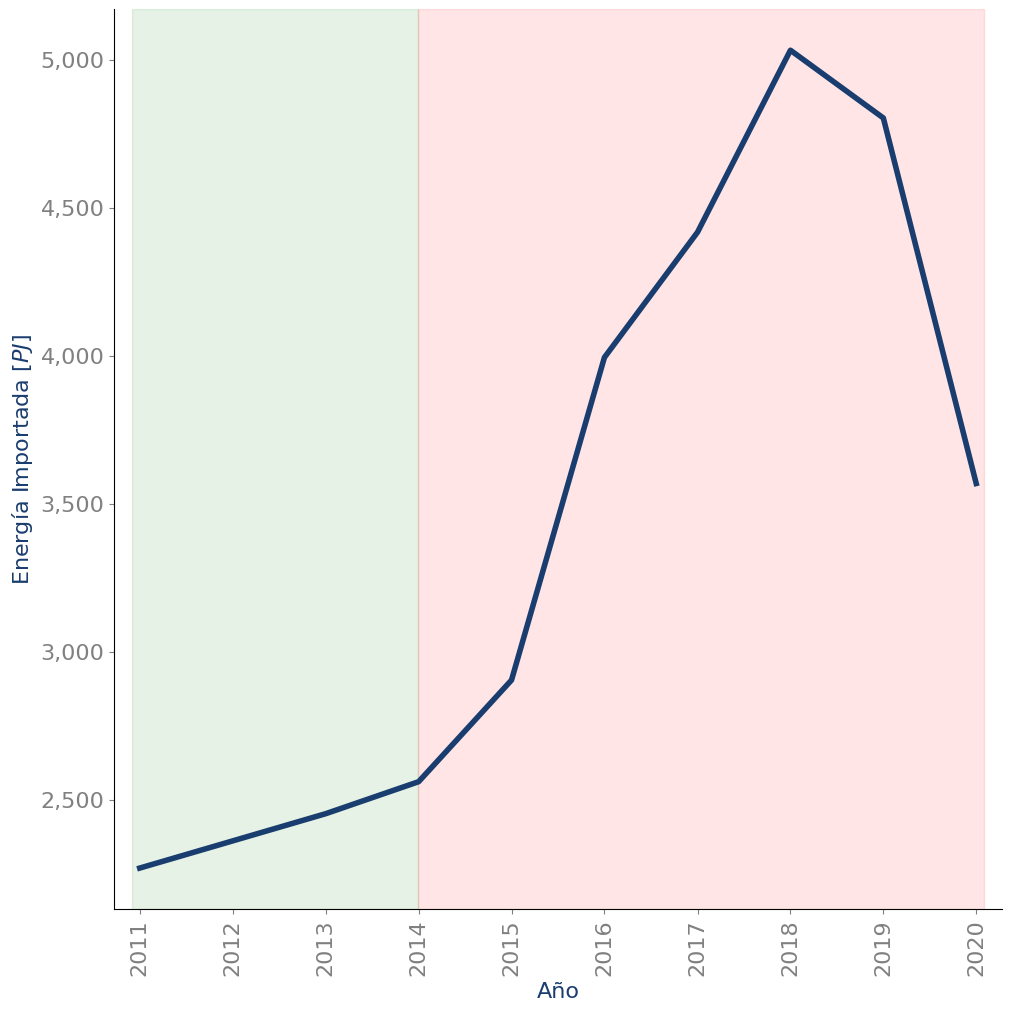

In [137]:
fig, ax = plt.subplots(constrained_layout=True)

#Grafica datos
ax.plot(ind.Importación, '-',color=azulier)

#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2010-12-01"),parse("2013-12-31"),alpha=0.1,color='green')
ax.axvspan(parse("2013-12-31"),parse("2020-01-31"),alpha=0.1,color="r")

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
# ax.set_ylim(0,1.2)

#Etiquetas y texto
ax.set_ylabel("Energía Importada [$PJ$]",c=azulier)
ax.set_xlabel("Año",c=azulier)


# Formato de gr'afica
ax.set_xticklabels(range(2010,2021,1),rotation=90)
ax.spines[['top','right']].set_visible(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))



# fig.savefig('Fig3.png',transparent=True)
